# 1. Importing pandas 

In [1]:
import pandas as pd
import numpy as np

# Importing fifa.csv dataset

In [2]:
data = pd.read_csv("fifa.csv")

# 2. Checking first few samples


In [3]:
# 1st row
row1 = data.sample(n = 1)
print(row1)

          ID       Name  Age                                           Photo  \
3600  207997  Albentosa   29  https://cdn.sofifa.org/players/4/19/207997.png   

     Nationality                                 Flag  Overall  Potential  \
3600       Spain  https://cdn.sofifa.org/flags/45.png       72         72   

                        Club                                       Club Logo  \
3600  Gimnàstic de Tarragona  https://cdn.sofifa.org/teams/2/light/15019.png   

      ... Composure Marking StandingTackle  SlidingTackle  GKDiving  \
3600  ...      53.0    74.0           70.0           61.0      12.0   

      GKHandling GKKicking GKPositioning GKReflexes  Release Clause  
3600        15.0      11.0          12.0       11.0             NaN  

[1 rows x 60 columns]


In [4]:
# First 10 rows
rows10 = data.head(10)
print(rows10)

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   
5  183277          E. Hazard   27   
6  177003          L. Modrić   32   
7  176580          L. Suárez   31   
8  155862       Sergio Ramos   32   
9  200389           J. Oblak   25   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5  https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6  https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7  https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8  http

# 3. Listing column headers for dataset

In [5]:
print(data.keys())

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')


# Dropping columns not needed for data analysis

In [6]:
data = data[['ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']]
print(data.keys())

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')


# 4. Preprocessing 'Value' column


In [7]:
multi=[]
data['Value'] = data['Value'].str.slice(1)

for index in data.index:
    try:
        if data.loc[index,'Value'][-1]=="M":
            multi.append(float(1000000))        
        elif data.loc[index,'Value'][-1]=="K":
            multi.append(float(1000))
        else:
            multi.append(float(1))
    except:
        multi.append(float(0))

data['Mult']=multi
data['Value'] = data['Value'].str.slice(0,-1)
data['Value']=pd.to_numeric(data['Value'])
data['Value']=pd.to_numeric(data['Value']*data['Mult'])
data = data.drop('Mult', axis=1)

print(data['Value'].head(5))

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64


# Similarly Preprocessing 'Wage' and 'Release Clause' columns

In [8]:
multiW=[]
multiR=[]
data['Wage'] = data['Wage'].str.slice(1)
data['Release Clause'] = data['Release Clause'].str.slice(1)

for index in data.index:
    try:
        if data.loc[index,'Wage'][-1]=="M":
            multiW.append(float(1000000))        
        elif data.loc[index,'Wage'][-1]=="K":
            multiW.append(float(1000))
        else:
            multiW.append(float(1))
    except:
        multiW.append(float(0))

for index in data.index:
    try:
        if data.loc[index,'Release Clause'][-1]=="M":
            multiR.append(float(1000000))        
        elif data.loc[index,'Release Clause'][-1]=="K":
            multiR.append(float(1000))
        else:
            multiR.append(float(1))
    except:
        multiR.append(float(0))
    

data['MultW']=multiW
data['Wage'] = data['Wage'].str.slice(0,-1)
data['Wage']=pd.to_numeric(data['Wage'])
data['Wage']=pd.to_numeric(data['Wage']*data['MultW'])

data['MultR']=multiR
data['Release Clause'] = data['Release Clause'].str.slice(0,-1)
data['Release Clause']=pd.to_numeric(data['Release Clause'])
data['Release Clause']=pd.to_numeric(data['Release Clause']*data['MultR'])

data = data.drop('MultR', axis=1)
data = data.drop('MultW', axis=1)

print(data[['Wage','Release Clause']].head(5))

       Wage  Release Clause
0  565000.0     226500000.0
1  405000.0     127100000.0
2  290000.0     228100000.0
3  260000.0     138600000.0
4  355000.0     196400000.0


# 5. Preprocessing 'Joined' column 

In [28]:
data['Joined'].bfill(inplace=True)
data['Joined']=data["Joined"].astype(str).str[-4:].astype('int64')

print(data['Joined'].head(5))

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64


# 6. Converting 'Contract Valid Until' to Pandas datetime format

In [29]:
data['Contract Valid Until']=pd.to_datetime(data['Contract Valid Until'])

print(data['Contract Valid Until'].head(5))

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]


# 7. Preprocessing 'Height' column

In [30]:
data['Height'] = data['Height'].str.split("'")
data['Height'] = (pd.to_numeric(data['Height'].str[0])*12)+(pd.to_numeric(data['Height'].str[1]))

print(data['Height'].head(5))

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64


# 8. Preprocessing 'Weight' column

In [31]:
data['Weight'] = pd.to_numeric(data['Weight'].str.split("lbs").str[0])

print(data['Weight'].head(5))

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64


# 9. Checking for % of missing values

In [32]:
#  By Rows
    # 'Joined' and 'Loaned From' columns are mutual so we will treat them as merged and subtract 1 from missing data count
    # to find if a row has missing data
    
data['Missing Data']=data.isnull().sum(axis=1)-1
count_missing_rows=len(data[data['Missing Data']>0])
per=(count_missing_rows*100)/len(data['Missing Data'])
print("% of Rows with missing entries in atleast one column: "+str(per)+" %")

% of Rows with missing entries in atleast one column: 1.6477179106936892 %


In [33]:
# By Columns

missing_col=data.info()
print(missing_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     17955 non-null  float64       
 8   Wage                      17966 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

# 9.2 Imputing missing data

In [37]:
data['Club']=data['Club'].fillna(data['Club'].mode())
data['Value']=data['Value'].fillna(data['Value'].mean())
data['Wage']=data['Wage'].fillna(data['Wage'].mean())
data['Position']=data['Position'].fillna(data['Position'].mode())
data['International Reputation']=data['International Reputation'].fillna(data['International Reputation'].mean())
data['Jersey Number']=data['Jersey Number'].fillna(data['Jersey Number'].mean())
data['Release Clause']=data['Release Clause'].fillna(data['Release Clause'].mean())
data['Club'].bfill(inplace=True)
data['Preferred Foot'].bfill(inplace=True)
data['International Reputation'].bfill(inplace=True)
data['Weak Foot'].bfill(inplace=True)
data['Skill Moves'].bfill(inplace=True)
data['Work Rate'].bfill(inplace=True)
data['Body Type'].bfill(inplace=True)
data.bfill(inplace=True)


print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

# 10. Plotting Data

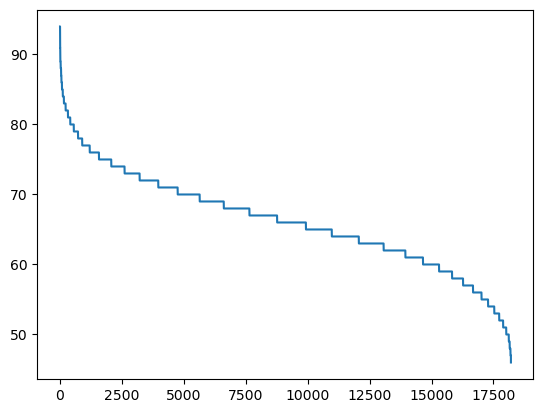

In [38]:
import matplotlib.pyplot as plt
data['Overall'].plot()
plt.show()

In [39]:
# Findings 
# The distribution of data using 'Overall' forms an almost smooth quadratic curve
# The curve tends towards 100 rating at lower players count and inflects to 0 rating as the player count increases
# The curve is available on 'Overall_Plot.png' file

# 11. Retreiving name of top 20 players based on overall

In [40]:
print(data.sort_values('Overall',ascending = False).head(20)['Name'])

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
12             D. Godín
13          David Silva
9              J. Oblak
11             T. Kroos
10       R. Lewandowski
20      Sergio Busquets
24         G. Chiellini
23            S. Agüero
22             M. Neuer
21            E. Cavani
16              H. Kane
Name: Name, dtype: object


# 12. Creating dataframe for top 20 players

In [42]:
top_20=data.sort_values('Overall',ascending = False).head(20)
print(top_20)

        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        David Silva   32       Spain       90         90   
9   200389           J. Oblak   25    Slovenia       90         93   
11  182521           T. Kroos   28     Germany       90         90   
10  188545     R. Le

# 13. Average Age and Wage of top 20 players

In [43]:
top_20_age_wage=top_20[['Age','Wage']]
print("Top 20 Players Stats")
print("Average Age: "+str(top_20_age_wage['Age'].mean()))
print("Average Wage: "+str(top_20_age_wage['Wage'].mean()))

Top 20 Players Stats
Average Age: 29.55
Average Wage: 294950.0


# 14. Highest Wage player

In [44]:
print("Highest Wage Player: ")
print(str(top_20.sort_values('Wage',ascending = False).head(1)[['Name','Wage']]))

Highest Wage Player: 
       Name      Wage
0  L. Messi  565000.0


# 15. Creating 'Club' based dataframe

In [45]:
data_club=data[['Name','Club','Wage','Overall']]
print(data_club)

                     Name                 Club      Wage  Overall
0                L. Messi         FC Barcelona  565000.0       94
1       Cristiano Ronaldo             Juventus  405000.0       94
2               Neymar Jr  Paris Saint-Germain  290000.0       92
3                  De Gea    Manchester United  260000.0       91
4            K. De Bruyne      Manchester City  355000.0       91
...                   ...                  ...       ...      ...
18202        J. Lundstram      Crewe Alexandra    1000.0       47
18203  N. Christoffersson       Trelleborgs FF    1000.0       47
18204           B. Worman     Cambridge United    1000.0       47
18205      D. Walker-Rice      Tranmere Rovers    1000.0       47
18206           G. Nugent      Tranmere Rovers    1000.0       46

[18207 rows x 4 columns]


# 15. (i) Average 'Overall' ratings based on 'Club'

In [47]:
data_club_avg=data_club[['Club','Wage','Overall']]
data_club_avg=data_club_avg.groupby('Club',as_index=False).mean()
print(data_club_avg[['Club','Overall']])

                      Club    Overall
0      SSV Jahn Regensburg  65.586207
1    1. FC Heidenheim 1846  65.862069
2     1. FC Kaiserslautern  63.384615
3               1. FC Köln  70.862069
4          1. FC Magdeburg  65.615385
..                     ...        ...
646     Zagłębie Sosnowiec  60.760000
647        Çaykur Rizespor  66.900000
648              Örebro SK  60.642857
649          Östersunds FK  63.545455
650          Śląsk Wrocław  62.200000

[651 rows x 2 columns]


# 15. (ii) Plotting 'Club' vs 'Overall' for top 10 clubs

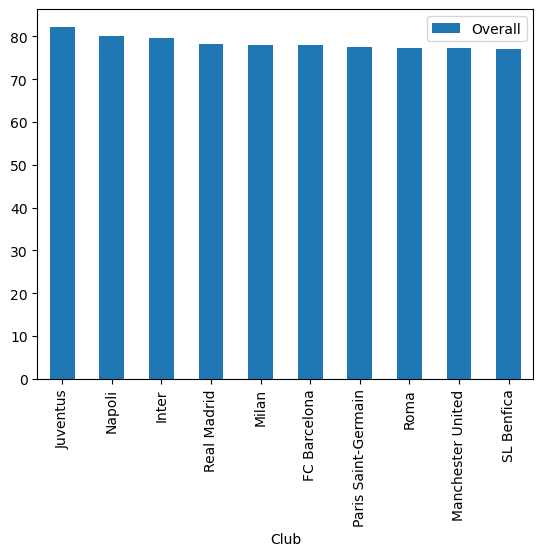

In [48]:
data_club_avg_top10=data_club_avg.sort_values('Overall',ascending=False).head(10)[['Club','Overall']]
data_club_avg_top10.plot(x='Club',y='Overall',kind='bar')
plt.show()

In [49]:
# 'Club' vs 'Overall' can be seen from 'Club_based_overall_top10.png'

# 16. Relationship between 'Age' and 'Potential'

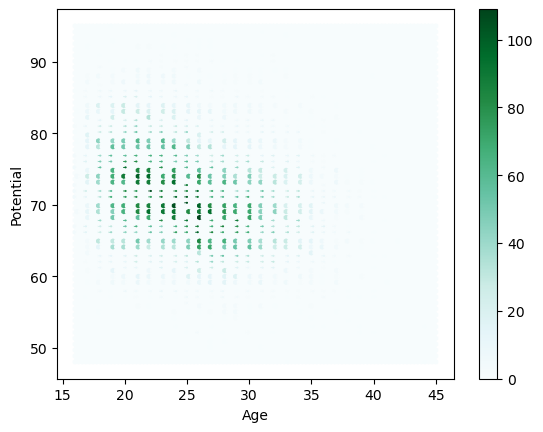

In [50]:
data.plot.hexbin(x='Age',y='Potential')
plt.show()

In [51]:
# Plot can be seen at 'potential_vs_age.png'
# Findings:
# In the plot we can observe where greater proportions of players are located. There are more younger players with a potential
# around the 75 mark while more ‘middle-aged’ players currently have a lower potential, around 70. Potential contnues to decrese
# to around 65 for 'old-aged' players.

# 17. Factors effecting 'Wage'

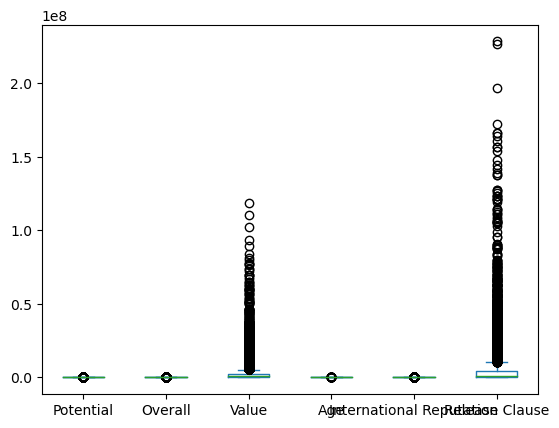

In [52]:
data.plot.box(y=['Potential','Overall','Value','Age','International Reputation','Release Clause'],x='Wage')
plt.show()

In [53]:
# Plot can be seen at 'factors_effecting_wage.png'
# Findings:
# In the plot we can observe that the factors which effect player 'Wage' are 'Value' and 'Realease Clause'

# 18. Player 'Position' plot

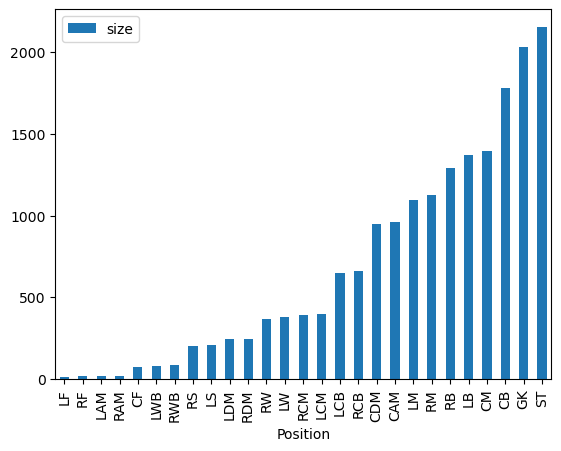

In [54]:
data_position=data.groupby('Position',as_index=False).size()
data_position=data_position.sort_values('size')
data_position.plot(y='size',x='Position',kind='bar')
plt.show()

In [55]:
# Plot can be seen at 'position_stats.png'
# Findings:
# Least played position: LF
# Most played position: ST

# 19. Filtering players with Club = 'Juventus' and Wage > 200K

In [56]:
data_filtered=data[(data['Club']=='Juventus') & (data['Wage']>200000)]
print(data_filtered)

        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Marking  StandingTackle  \
1   77000000.0  405000.0          Right  ...     28.0            31.0   
15  89000000.0  205000.0           Left  ...     23.0            20.0   
24  27000000.0  215000.0           Left  ...     93.0            93.0   

    SlidingTackle GKDiving GKHandling GKKicking  GKPositioning  GKReflexes  \
1            23.0      7.0       11.0      15.0           14.0        11.0   
15           20.0      5.0        4.0       4.0            5.0         8.0   
24           90.0      3.0        3.0       2.0            4.0         3.0   

   Release Clause Missing Data  
1     127100000.0            0  
15    1

In [57]:
# No. of such player = 3

# 20. Filtering top 5 players for each position

In [58]:
positions=[]
positions=data_position['Position'].tolist()
top_5_by_position=data.head(0)

for index in positions:
    players_pos=data[(data['Position']==index)]
    players_pos=players_pos.sort_values('Overall',ascending=False).head(5)
    top_5_by_position=top_5_by_position.append(players_pos,ignore_index=True)
      
print(top_5_by_position)

         ID               Name  Age Nationality  Overall  Potential  \
0    183277          E. Hazard   27     Belgium       91         91   
1    211110          P. Dybala   24   Argentina       89         94   
2        41            Iniesta   34       Spain       86         86   
3    198164     Jonathan Viera   28       Spain       82         82   
4    190577          S. Blanco   30   Argentina       76         76   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                        Club       Value      Wage Preferred Foot  ...  \
0                    Chelsea  93000000.0  340000.0          Right  ...   

C:\Users\Akshat\AppData\Local\Temp\ipykernel_16816\3955331869.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_by_position=top_5_by_position.append(players_pos,ignore_index=True)


# 21. Average 'Wage' of top 5 players for each position

In [59]:
positions_avg_wage=top_5_by_position[['Position','Wage']]
positions_avg_wage=positions_avg_wage.groupby('Position').mean()
print(positions_avg_wage)

              Wage
Position          
CAM       174000.0
CB        139600.0
CDM       217000.0
CF         47400.0
CM        130600.0
GK        192800.0
LAM        81600.0
LB        177200.0
LCB       162000.0
LCM       184400.0
LDM       126600.0
LF        121200.0
LM        164600.0
LS        130200.0
LW        261000.0
LWB        34200.0
RAM        45400.0
RB        155400.0
RCB       231000.0
RCM       240800.0
RDM       105000.0
RF        148000.0
RM        131400.0
RS        132200.0
RW        202000.0
RWB        44200.0
ST        294000.0


# Exporting output data

In [60]:
data.to_csv("output_info.csv")